# 为什么选择Seaborn
Seaborn是基于matplotlib的python数据可视化库，提供更高层次的API封装，包括一些高级图表可视化等工具。

# 风格及调色盘
对绘图整体风格进行设置，包括图表颜色/比例/颜色面板等。随后调用系统风格进行数据可视化。
seaborn风格设置一次**风格**后全部回话时期内都有效
* set() 设置默认风格，暗色+网格
* set_style() 切换图表风格  
* axes_style()
* despine()
* set_context()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

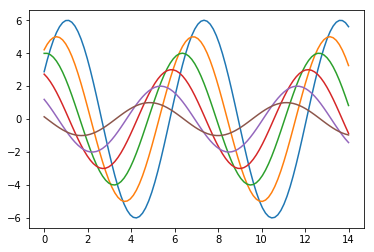

In [2]:
# 创建正弦函数及绘图

def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x+i*.5)*(7-i)*flip)
sinplot()

## 风格设置
### set() 设置为默认风格
* .set() 设置默认风格，为暗色+网格
* seaborn中使用set设置风格后，在当前会话期间内**持续有效**

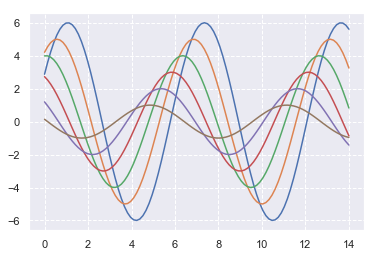

In [3]:
sns.set() # 设置为sns默认风格，暗色网格显示
sinplot()
plt.grid(linestyle='--') # 设置网格为虚线

### set_style() 切换图表风格
可选风格：white, dark, whitegrid, darkgrid, ticks
- ticks切换为有坐标轴竖线的风格

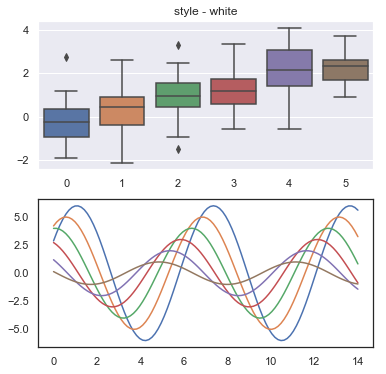

In [4]:
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(2, 1, 1)
sns.set_style('white') # 设置风格为white

data = np.random.normal(size=(20, 6)) + np.arange(6)/2
sns.boxplot(data=data)
plt.title('style - white')

ax2 = fig.add_subplot(2, 1, 2)
sinplot()

### despine() 设置图表坐标轴
语法如下：  
    sns.despine(fig=None, ax=None, top=None, right=True, left=False, bottom=False, offset=None, trim=False)
- offset: 与坐标轴之间的偏移
- trim: trim为True时，坐标轴范围限制在数据最大最小值
- top/right/left/bottom: 为**True时不显示**相应方位的坐标轴，默认只**显示左下坐标轴**  

despine设置一次，**长期有效**

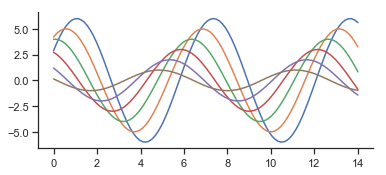

In [5]:
sns.set_style('ticks') # 设置ticks风格
fig = plt.figure(figsize=(6, 9)) # 创建图表
plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(3, 1, 1)
sinplot()
sns.despine() # 默认只显示左下坐标轴

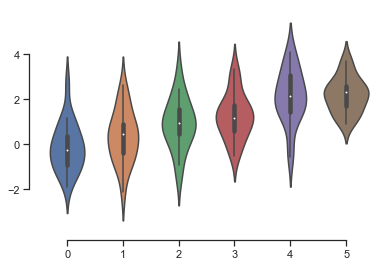

In [6]:
ax2 = fig.add_subplot(3, 1, 2)
sns.violinplot(data=data)
sns.despine(offset=10, trim=True) # 同坐标轴偏移为10，并且坐标轴范围限制在最大最小值

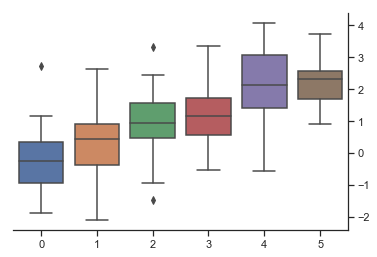

In [7]:
ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(data=data, palette='deep')
sns.despine(left=True, right=False) # 只显示右下坐标轴

### axes_style() 设置局部图表风格
axes_style()设置局部风格，可以搭配**with**使用

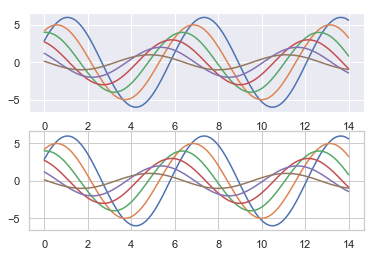

In [8]:
# 局部图表风格，用with做代码块区分
with sns.axes_style('darkgrid'):
    plt.subplot(2, 1, 1)
    sinplot()

# 外部全局图表风格
sns.set_style('whitegrid')
plt.subplot(2, 1, 2)
sinplot()

### set_context() 设置显示比例尺度
- 选项包括: paper, notebook, talk, poster  
- 默认为**notebook**

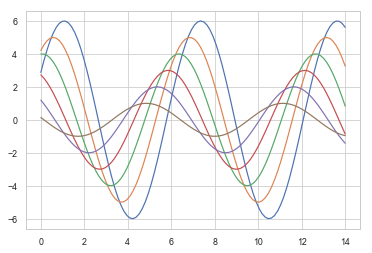

In [9]:
sns.set_context('paper')
sinplot()

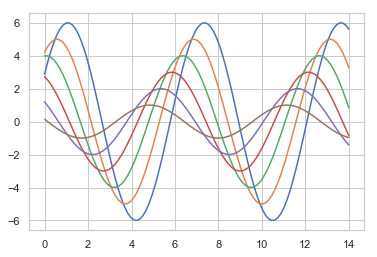

In [10]:
sns.set_context('notebook')
sinplot()

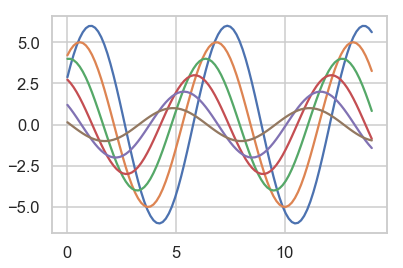

In [11]:
sns.set_context('talk')
sinplot()

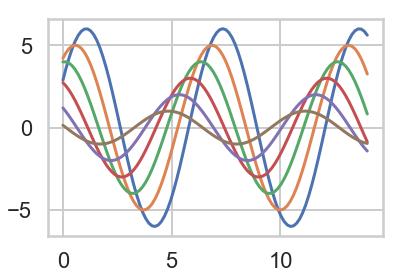

In [12]:
sns.set_context('poster')
sinplot()

## 调色盘
调色盘是对图表**整体**颜色/比例等进行风格设置，包括颜色面板等。调用系统风格进行数据可视化  
**color_palette()**  
官方文档：http://seaborn.pydata.org/tutorial/color_palettes.html  
参考译文：https://www.jianshu.com/p/25bfbca6fc0b

### color_palette()
* 语法如下：  
seaborn.color_palette(palette=None, n_colors=None, desat=None)  
* 默认有6种颜色：deep, muted, pastel, bright, dark, colorblind

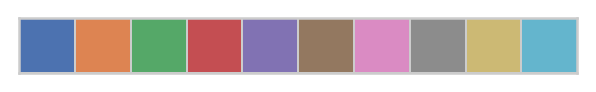

In [13]:
# 显示当前调色板
current_palette = sns.color_palette() # 读取默认颜色
sns.palplot(current_palette) # 显示调色盘

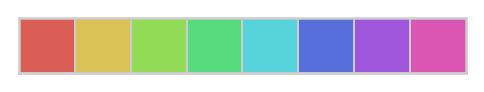

In [14]:
# 其他颜色风格
sns.palplot(sns.color_palette('hls', 8)) # 颜色风格为hls, 色块8个

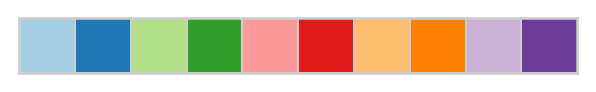

In [15]:
# 分组颜色设置 - Paired
sns.palplot(sns.color_palette('Paired', 10)) # 分为10组不同颜色

### 设置亮度/饱和度
适用方法:
    1. husl_palette([n_colors, h, s, l])
    2. hls_palette([n_colors, h, l, s])
    
- l: 亮度, [0, 1]
- s: 饱和度, [0, 1]

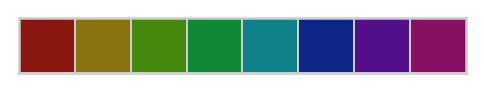

In [16]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8)) # 8个色块，亮度为.3，饱和度为.8

### cubehelix_palette() 按照线性增长计算设置颜色
语法如下：  
sns.cubehelix_palette(n_colors, start, rot, dark, light, gamma, reverse=False)
- n_colors: 颜色个数
- start: [0, 3]，表示开始的颜色
- rot: 颜色旋转角度，用于定义结束的颜色
- dark/light: [0, 1]，表示颜色深浅
- gamma: 颜色gamma值，越大颜色越暗
- reverse: 默认为False，颜色由浅到深

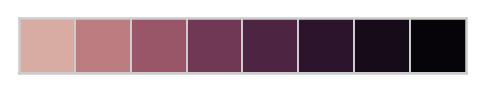

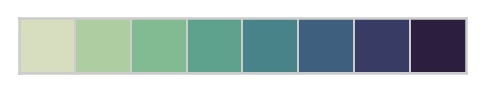

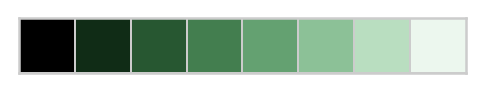

In [17]:
sns.palplot(sns.cubehelix_palette(8, gamma=2))
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

### dark_palette() / light_palette() 调节颜色深浅

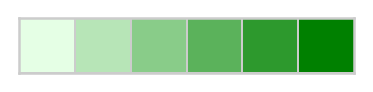

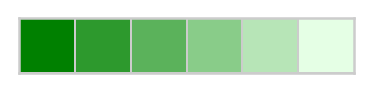

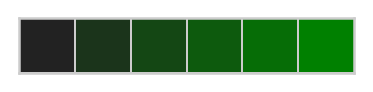

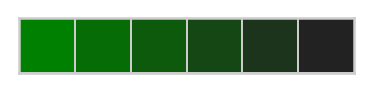

In [18]:
sns.palplot(sns.light_palette('green')) # 按照green做浅色调色盘，传入的green为颜色的值(color='g')
sns.palplot(sns.light_palette('green', reverse=True))
sns.palplot(sns.dark_palette('green'))
sns.palplot(sns.dark_palette('green', reverse=True))

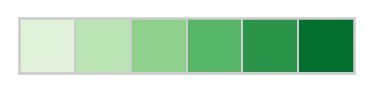

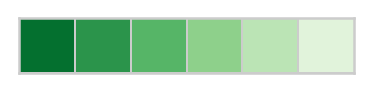

In [19]:
sns.palplot(sns.color_palette('Greens')) # 效果同上，但Greens为cmap值(cmap='Green')
sns.palplot(sns.color_palette('Greens_r'))

### diverging_palette() 创建离散颜色
语法如下：  
sns.diverging_palette(h_neg, h_pos, s=75, l=50, sep=10, n=6, center='light', as_cmap=False)
- h_neg/h_neg: 起始/终止颜色值
- s: [0, 100], 饱和度
- l: [0, 100], 亮度
- n: 颜色数量
- center: 中心颜色为浅色(light)还是深色(dark)，默认为浅色light

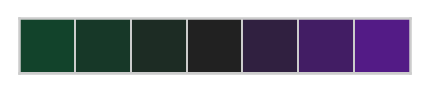

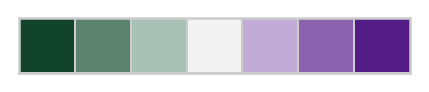

In [20]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7, center='dark'))
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7, center='light'))

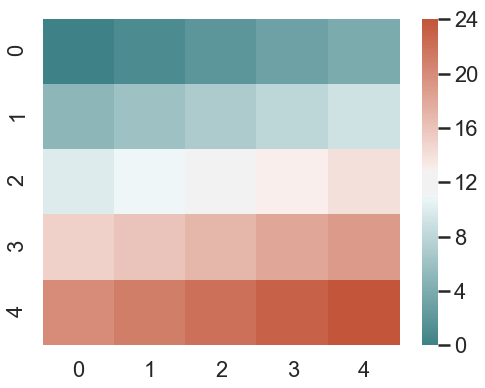

In [21]:
plt.figure(figsize=(8, 6))
x = np.arange(25).reshape(5, 5)
cmap = sns.diverging_palette(200, 20, sep=20, as_cmap=True) # 设置为调色盘
sns.heatmap(x, cmap=cmap) # 热力图

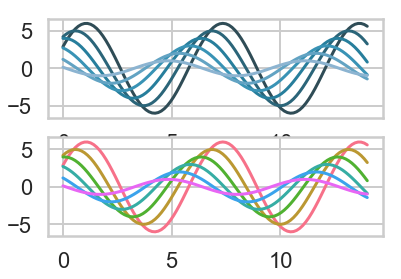

In [22]:
# 设置调色板后，绘图创建图表

sns.set_style('whitegrid')

with sns.color_palette('PuBuGn_d'): # 设置调色盘
    plt.subplot(211)
    sinplot()
    
sns.set_palette('husl')
plt.subplot(212)
sinplot()

# 分布数据可视化
**分布数据**：查看数据分布情况

## 直方图 & 密度图
* distplot() 直方图
* kdeplot() 密度图
* rugplot() 数据频率分布图

In [23]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set_context('paper')

### 直方图
sns.distplot()  

| 参数 | 含义 |
| :-: | :-: |
| bins | 箱数 |
| hist | 是否显示箱 |
| hist_kws | hist_kws={'histtype':'step', 'linewidth':1, 'alpha':1, 'color':'g'} <br> (箱子的风格、线宽、透明度、颜色) <br> 箱子风格包括: bar/barstacked/step/stepfilled |
| ked | 是否显示密度曲线 <br> ked_kws: ked_kws={'color':'k', 'lw':1, 'label':'KDE', 'linestyle':'--'} <br> (密度曲线的颜色、线宽、标注、线形) |
| norm_hist | 直方图是否按照**密度**来显示 |
| rug | 是否显示数据分布情况(底部竖线) |
| rug_kws | 数据频率分布颜色 |
| vertical | 是否水平显示 |
| color | 设置颜色 |
| label | 图例 |
| axlabel | x轴标注 |


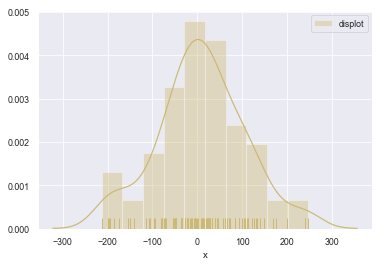

In [24]:
rs = np.random.RandomState(10)
s = pd.Series(rs.randn(100)*100) # 产生数据
sns.distplot(s, bins=10, hist=True, kde=True, norm_hist=False, rug=True, vertical=False, 
             color='y', label='displot', axlabel='x')
plt.legend() # 显示图例

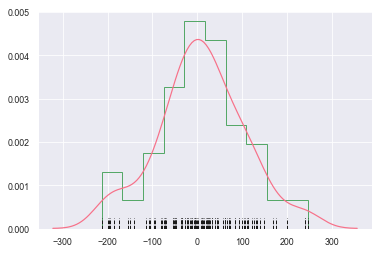

In [25]:
sns.distplot(s, rug=True,
            rug_kws={'color':'k', 'lw':1, 'label':'KDE', 'linestyle':'--'},
            hist_kws={'histtype':'step', 'linewidth':1, 'alpha':1, 'color':'g'})

### 密度图
**sns.kdeplot()**

|参数|含义|
|-|-|
|shade|是否填充|
|color|颜色|
|vertical|是否水平|
|**bw**|控制拟合的程度，类似于直方图的箱数 <br> **一般不做设置** <br> bw越大越平滑

#### 单维度密度图

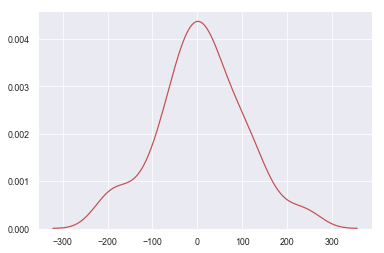

In [26]:
sns.kdeplot(s, shade=False, color='r', vertical=False)

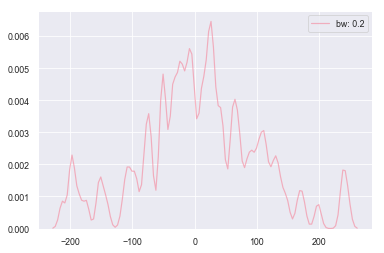

In [27]:
sns.kdeplot(s, bw=5, label='bw: 0.2', linestyle='-', linewidth=1.2, alpha=0.5)

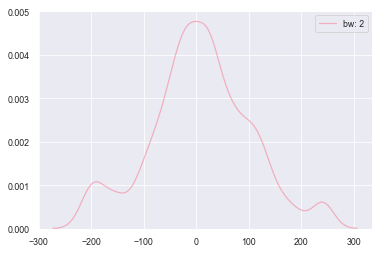

In [28]:
sns.kdeplot(s, bw=20, label='bw: 2', linestyle='-', linewidth=1.2, alpha=0.5)

#### 两维度密度图

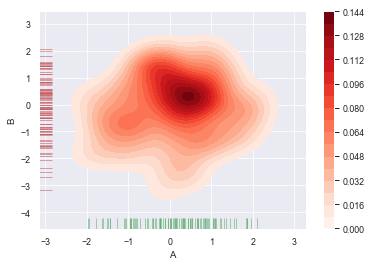

In [29]:
# 使用两维数据生成曲线密度图，以颜色作为密度衰减显示

rs = np.random.RandomState(20)
df = pd.DataFrame(rs.randn(100, 2), columns=['A', 'B'])
sns.kdeplot(df['A'], df['B'], # 直接传入数据
           cbar=True, # 是否显示颜色图例 (右侧图例)
           shade=True, # 是否填充
           cmap='Reds', # 设置调色盘
           shade_lowest=False, # 最外围颜色是否显示
           n_levels=20 # 曲线个数。个数越多过渡越平滑)
           )

sns.rugplot(df['A'], color='g', axis='x', alpha=0.5)
sns.rugplot(df['B'], color='r', axis='y', alpha=0.5)

## 数据频率分布图
**sns.rugplot()**
- height: 高度
- axis: 对应于哪条坐标轴

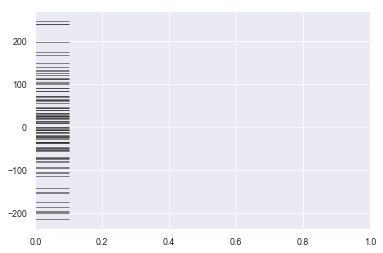

In [30]:
sns.rugplot(s, height=0.1, color='k', axis='y', alpha=0.5)

## 散点图

### jointplot() 综合散点图

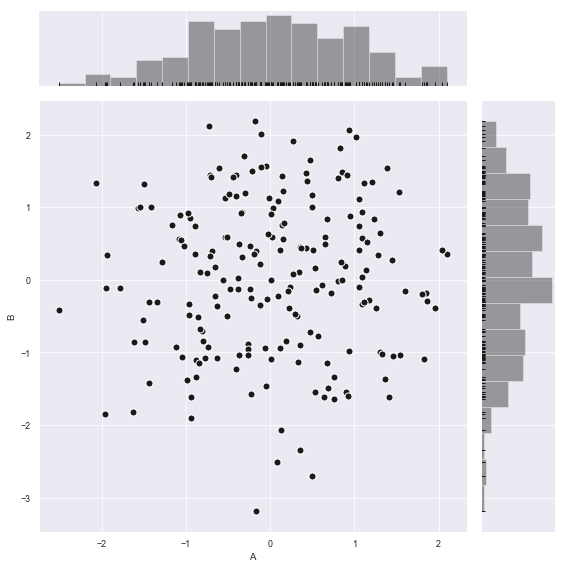

In [31]:
# scatter类型

rs = np.random.RandomState(20)
df = pd.DataFrame(rs.randn(200, 2), columns=['A', 'B'])

sns.jointplot(x=df['A'], y=df['B'], # 设置x/y轴，显示columns的名称
             data=df, # 数据传入
             color='k',
             s=50, edgecolor='w', linewidth=1, # 设置散点大小，边缘线颜色、宽度（只针对scatter）
             kind='scatter', # 设置类型: scatter/reg/resid/kde/hex
             space=0.2, # 散点图和布局图的间距
             size=8, # 图表大小 (自动调整为方形)
             ratio=5, # 散点图与布局图高度比 (int)
             marginal_kws=dict(bins=15, rug=True) # 设置柱形图箱数，及是否设置rug数据频率分布图
             )

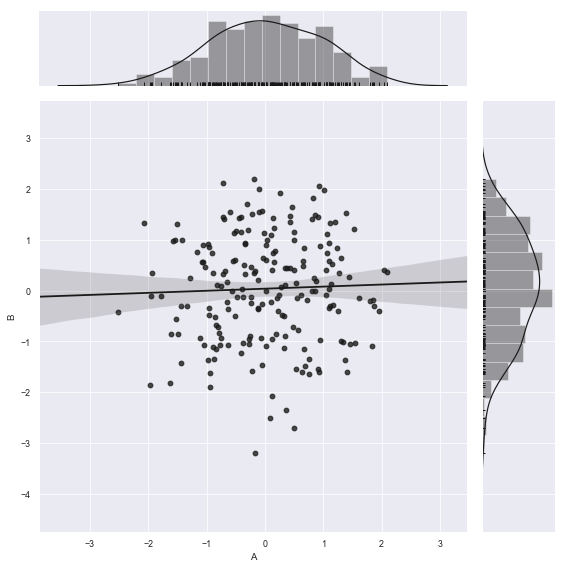

In [32]:
# reg类型
# 相关性分析，类似于回归分析

rs = np.random.RandomState(20)
df = pd.DataFrame(rs.randn(200, 2), columns=['A', 'B'])

sns.jointplot(x=df['A'], y=df['B'], # 设置x/y轴，显示columns的名称
             data=df, # 数据传入
             color='k',
#              s=50, edgecolor='w', linewidth=1, # 设置散点大小，边缘线颜色、宽度（只针对scatter）
             kind='reg', # 设置类型: scatter/reg/resid/kde/hex
             space=0.2, # 散点图和布局图的间距
             size=8, # 图表大小 (自动调整为方形)
             ratio=5, # 散点图与布局图高度比 (int)
             marginal_kws=dict(bins=15, rug=True) # 设置柱形图箱数，及是否设置rug数据频率分布图
             )

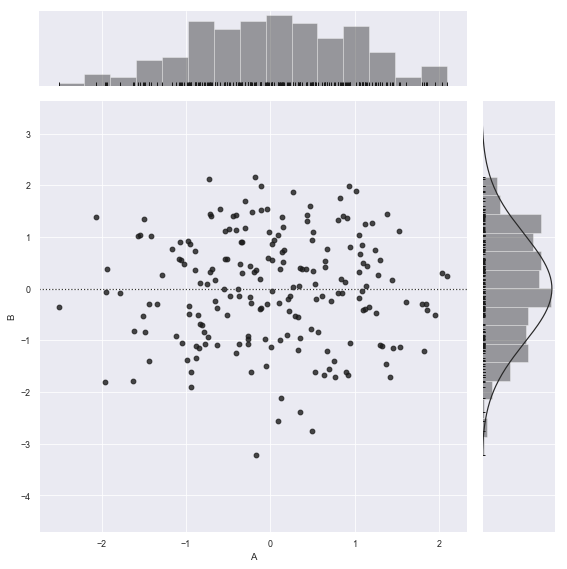

In [33]:
# resid类型

rs = np.random.RandomState(20)
df = pd.DataFrame(rs.randn(200, 2), columns=['A', 'B'])

sns.jointplot(x=df['A'], y=df['B'], # 设置x/y轴，显示columns的名称
             data=df, # 数据传入
             color='k',
#              s=50, edgecolor='w', linewidth=1, # 设置散点大小，边缘线颜色、宽度（只针对scatter）
             kind='resid', # 设置类型: scatter/reg/resid/kde/hex
             space=0.2, # 散点图和布局图的间距
             size=8, # 图表大小 (自动调整为方形)
             ratio=5, # 散点图与布局图高度比 (int)
             marginal_kws=dict(bins=15, rug=True) # 设置柱形图箱数，及是否设置rug数据频率分布图
             )

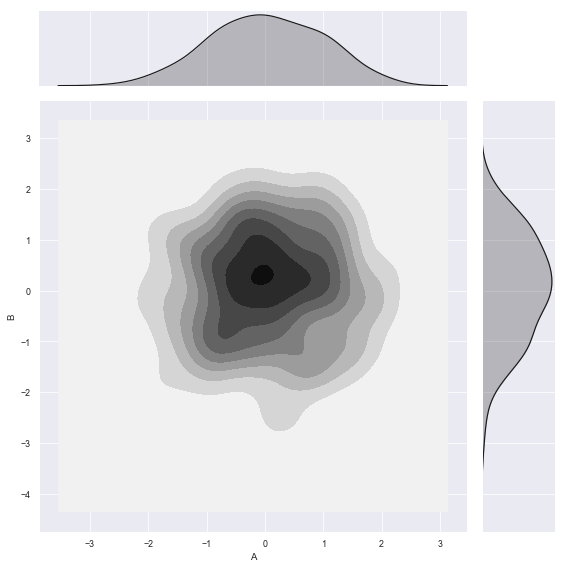

In [34]:
# kde类型 - 密度图

rs = np.random.RandomState(20)
df = pd.DataFrame(rs.randn(200, 2), columns=['A', 'B'])

sns.jointplot(x=df['A'], y=df['B'], # 设置x/y轴，显示columns的名称
             data=df, # 数据传入
             color='k',
#              s=50, edgecolor='w', linewidth=1, # 设置散点大小，边缘线颜色、宽度（只针对scatter）
             kind='kde', # 设置类型: scatter/reg/resid/kde/hex
             space=0.2, # 散点图和布局图的间距
             size=8, # 图表大小 (自动调整为方形)
             ratio=5, # 散点图与布局图高度比 (int)
#              marginal_kws=dict(bins=15, rug=True) # 设置柱形图箱数，及是否设置rug数据频率分布图
             )

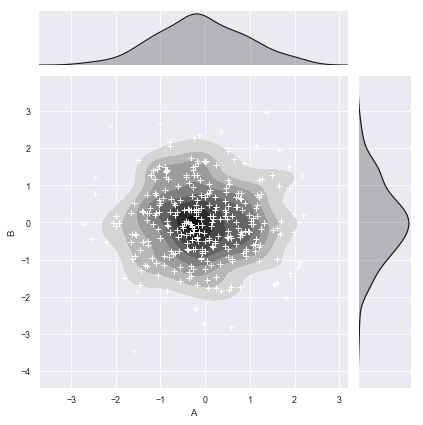

In [35]:
# kde密度图

rs = np.random.RandomState(15)
df = pd.DataFrame(rs.randn(300, 2), columns=['A', 'B'])

g = sns.jointplot(x=df['A'], y=df['B'],
                 data=df,
                 kind='kde',
                 color='k',
                 shade_lowest=False # 外侧不填充
                 )

# 添加散点图 plot_joint()
g.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker='+')

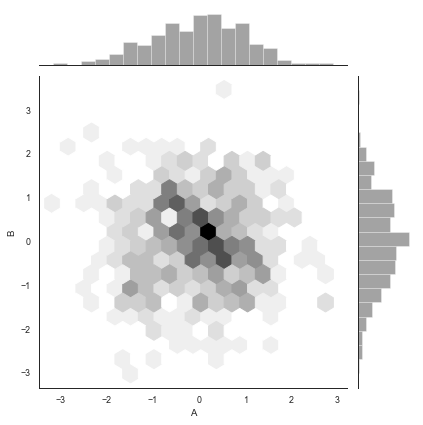

In [36]:
# hex类型 - 蜂窝图

df = pd.DataFrame(rs.randn(500, 2), columns=['A', 'B'])
with sns.axes_style('white'):
    sns.jointplot(x=df['A'], y=df['B'],
                 data=df,
                 kind='hex',
                 color='k',
                 marginal_kws=dict(bins=20)
                 )

### JointGrid() 拆分散点图
与jointplot相比，是**可拆分绘制的散点图**，将每一部分分开进行单独绘制

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


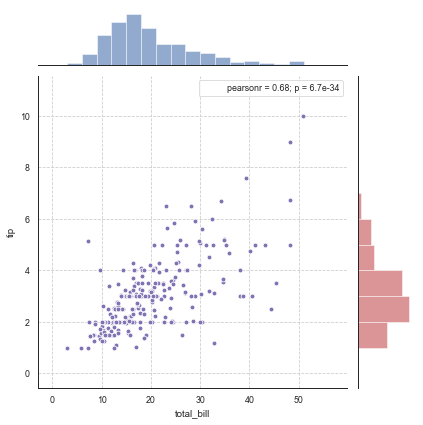

In [37]:
# plot_joint()主图 + ax_marg_x.hist()X轴直方图 + ax_marg_y.hist()Y轴直方图

sns.set_style('white')
tips = sns.load_dataset('tips') # 以sns内置tips数据为例
print(tips.head())

# 创建一个绘图表格区域，设置好x，y对应数据
g = sns.JointGrid(x='total_bill', y='tip', data=tips)
g.plot_joint(plt.scatter, color='m', edgecolor='white') # 设置框内图表，scatter散点图
g.ax_marg_x.hist(tips['total_bill'], color='b', alpha=.6, bins=np.arange(0,60,3)) # 设置X轴直方图，bins为数组
g.ax_marg_y.hist(tips['tip'], color='r', alpha=.6, orientation='horizontal', bins=np.arange(0,12,1)) # 设置y轴直方图

# 添加标注为pearsonr，可以为pearsonr/spearmanr
from scipy import stats
g.annotate(stats.pearsonr)

plt.grid(linestyle='--') # 绘图区域以--分隔

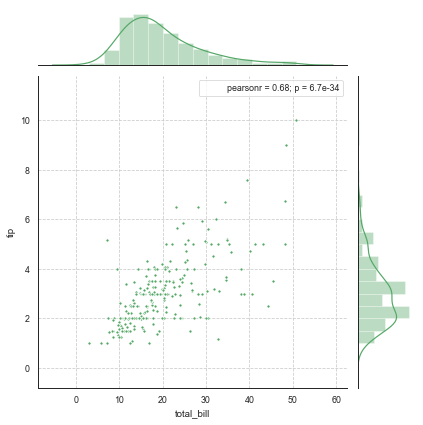

In [38]:
# plot_joint()主图 + plot_marginals()两侧图

g = sns.JointGrid(x='total_bill', y='tip', data=tips) # 创建绘图表格区域
g = g.plot_joint(plt.scatter, color='g', s=10, edgecolor='white') # 绘制散点图
plt.grid(linestyle='--')
g.plot_marginals(sns.distplot, kde=True, color='g') # 绘制两侧x&y轴直方图
g.annotate(stats.pearsonr)

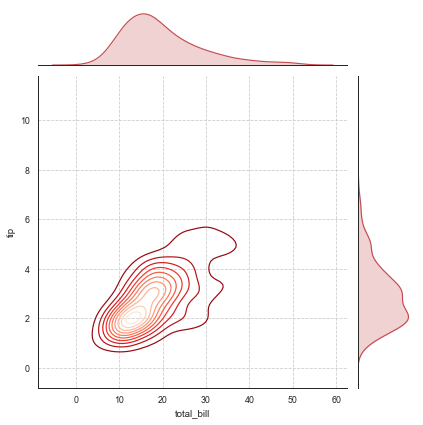

In [39]:
# plot_joint()主图 + plot_marginals()两侧图

g = sns.JointGrid(x='total_bill', y='tip', data=tips)
g = g.plot_joint(sns.kdeplot, cmap='Reds_r') # 绘制密度图
plt.grid(linestyle='--')
g.plot_marginals(sns.kdeplot, shade=True, color='r') # 绘制x&y轴密度图

### pariplot() 矩阵散点图

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


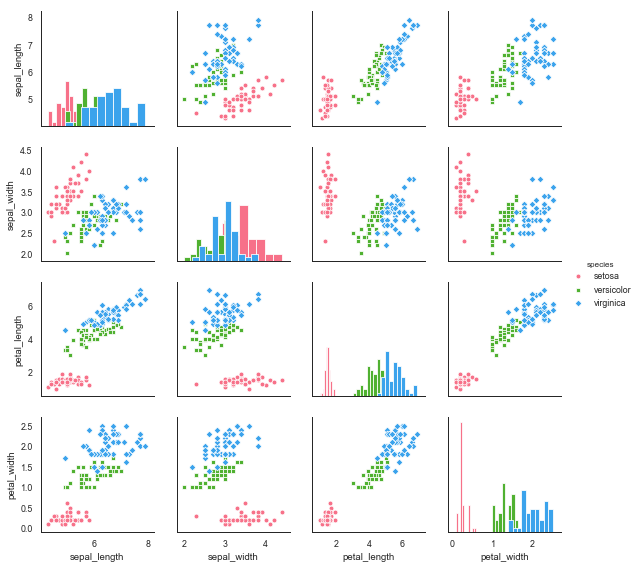

In [40]:
# 使用样本内全部特征的数据绘图

sns.set_style('white')
iris = sns.load_dataset('iris')
print(iris.head())

sns.pairplot(iris, 
             kind='scatter', # 散点图scatter，回归分布图reg
             diag_kind='hist', # 对角线上：直方图hist，密度图kde
             hue='species', # 按照某一字段进行分类
             palette='husl', # 设置调色板
             markers=['o', 's', 'D'], # 设置不同系列的点样式，个数同分类数相对应
             size=2, # 图表大小
            )

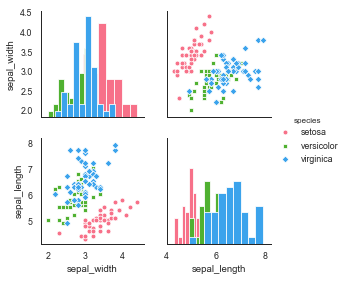

In [41]:
# 使用样本内部分特征的数据绘图

sns.pairplot(iris, 
             vars=['sepal_width', 'sepal_length'],
             kind='scatter', # 散点图scatter，回归分布图reg
             diag_kind='hist', # 对角线上：直方图hist，密度图kde
             hue='species', # 按照某一字段进行分类
             palette='husl', # 设置调色板
             markers=['o', 's', 'D'], # 设置不同系列的点样式，个数同分类数相对应
             size=2, # 图表大小
            )

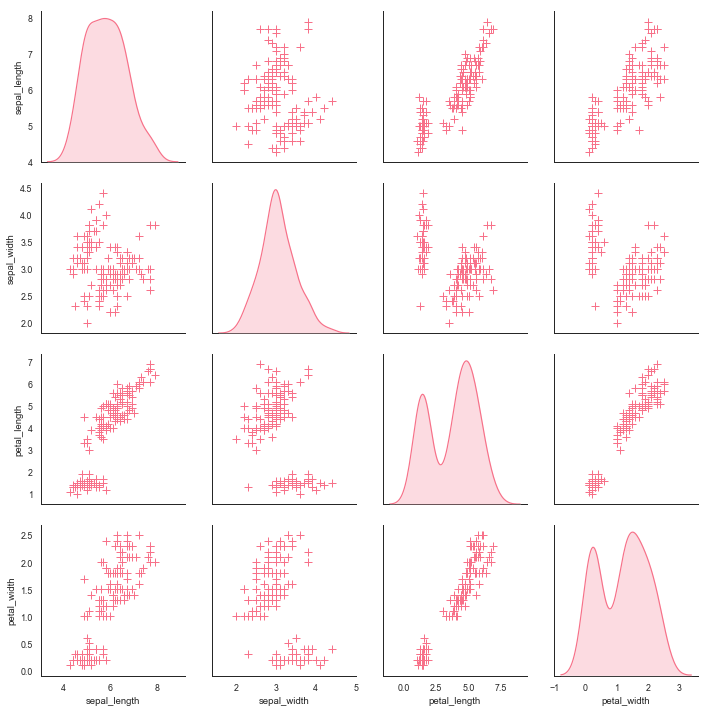

In [42]:
# 其他参数设置

sns.pairplot(iris, 
            diag_kind='kde',
            markers='+',
            plot_kws=dict(s=50, edgecolor='g', linewidth=1), # 设置点样式
            diag_kws=dict(shade=True) # 设置密度图样式
            )

### PairGrid() 拆分矩阵散点图


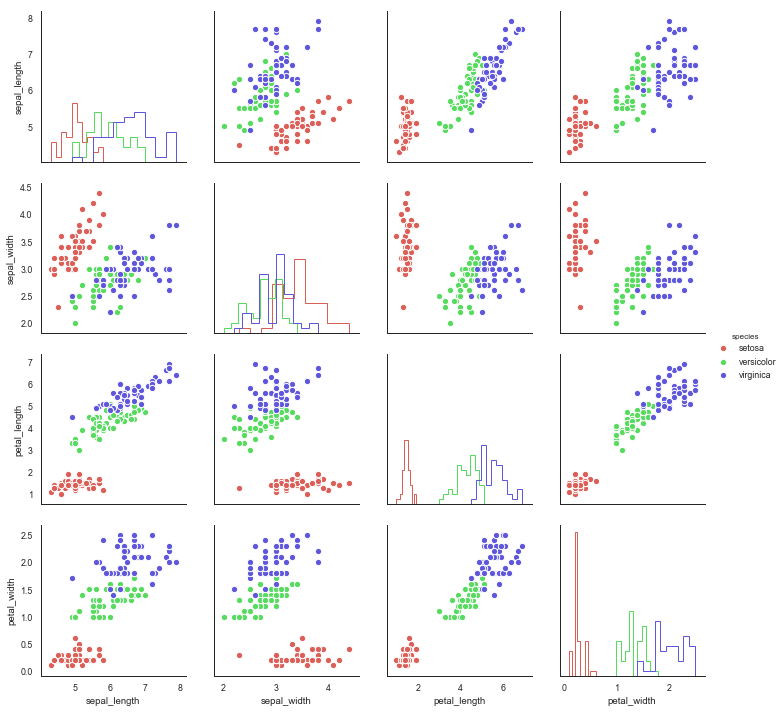

In [43]:
# map_diag()主对角线 + map_offdiag()非对角线

g = sns.PairGrid(iris,
                hue='species',
                palette='hls',
                vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], # 筛选
                )

# 对角线图表
g.map_diag(plt.hist,
          histtype='step', # 柱形图bar，堆叠柱形图barstacked，阶梯图step，填充阶梯图stepfilled
          linewidth=1,
#           edgecolor='w'
          )

# 非对角线图表
g.map_offdiag(plt.scatter,
             edgecolor='w',
             s=40,
             linewidth=1,
             )

# 添加图例
g.add_legend()

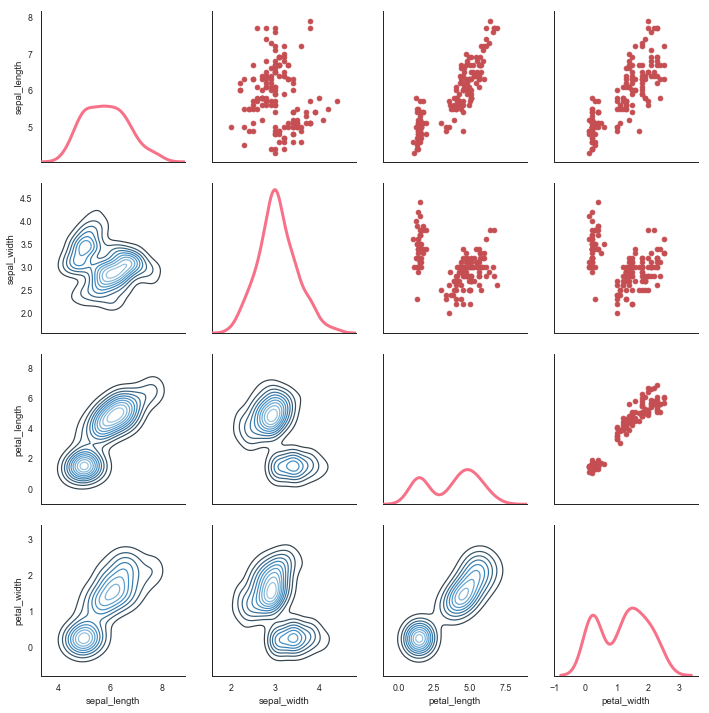

In [44]:
# map_diag()对角线图 + map_lower()对角线下端图表 + map_upper()对角线上端图表

g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot, lw=3) # 对角线图表
g.map_upper(plt.scatter, color='r') # 对角线上端图表
g.map_lower(sns.kdeplot, cmap='Blues_d') # 对角线下端图表

# 分类数据可视化

## stripplot() 分类绘制分布散点图
* jitter=True，点数据重合较多时使得绘图更清晰
* dodge=True，对jitter结果进行分类绘图
* hue，进行分组
* oredr，对x分组后的组类进行选择

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


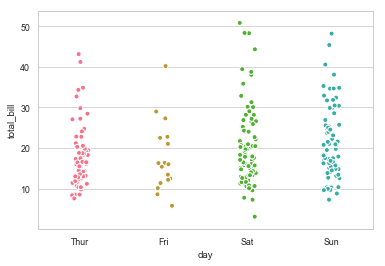

In [45]:
sns.set_style('whitegrid') # 设置风格
sns.set_context('paper') # 设置尺度

tips = sns.load_dataset('tips')
print(tips.head())

sns.stripplot(x='day', # 分组统计字段，使用该字段进行分组 
             y='total_bill', # 数据分布统计字段
             data=tips,
             jitter=True, # 当点数据重合较多时，设置jitter=True可使绘图情况更清晰，默认为False。也可以设置间距如jitter=0.1
             size=5,
             edgecolor='w',
             linewidth=1,
             marker='o'
             )

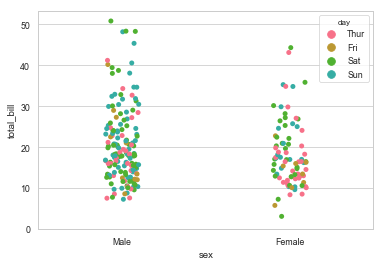

In [46]:
# 使用hue参数进行二次分组
# 先对sex进行分组，再对day进行分组

sns.stripplot(x='sex',
             y='total_bill',
             hue='day',
             data=tips,
             jitter=True
             )

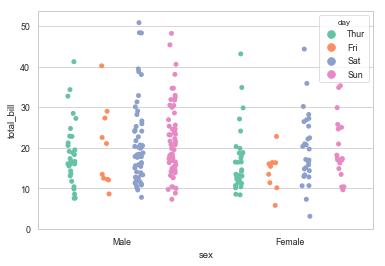

In [47]:
# didge参数将二次拆分后的数据进行拆分显示

sns.stripplot(x='sex',
             y='total_bill',
             hue='day',
             data=tips,
             jitter=True,
             palette='Set2', # 设置调色盘
             dodge=True, # 再次拆分进行显示
             )

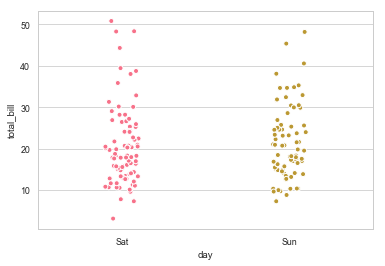

In [48]:
# order，对x参数分类后的类别中进行选择

sns.stripplot(x='day', # 分组统计字段，使用该字段进行分组 
             y='total_bill', # 数据分布统计字段
             data=tips,
             jitter=True, # 当点数据重合较多时，设置jitter=True可使绘图情况更清晰，默认为False。也可以设置间距如jitter=0.1
             size=5,
             edgecolor='w',
             linewidth=1,
             marker='o',
             order=['Sat', 'Sun'] # 只选择Sat，Sun的天数进行绘图
             )

## swarmplot() 分簇散点图
自动将**离散数值**用于数据划分。  
语法同stripplot类似。

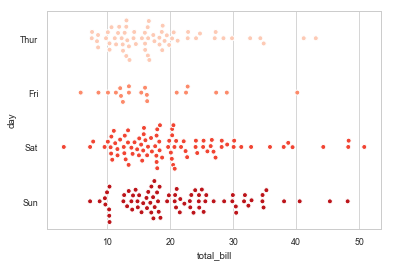

In [49]:
sns.swarmplot(x='total_bill', # 连续数值
             y='day', # 离散数值，用于分类
             data=tips,
             size=5,
             edgecolor='w',
             linewidth=1,
             marker='o',
             palette='Reds'
             )

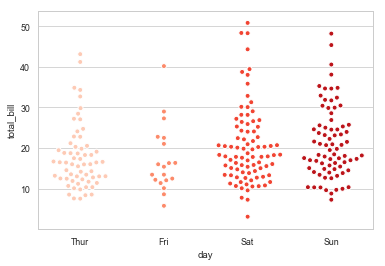

In [50]:
sns.swarmplot(y='total_bill', # 连续数值
             x='day', # 离散数值，用于分类
             data=tips,
             size=5,
             edgecolor='w',
             linewidth=1,
             marker='o',
             palette='Reds'
             )

## 分布图
* boxplot() 箱形图
* violinplot() 小提琴图
* lvplot() 梯形lv图

### boxplot() 箱形图

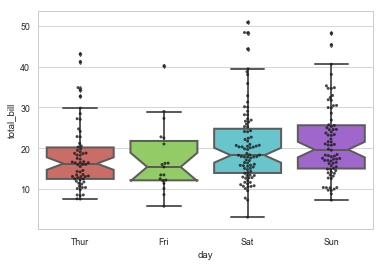

In [51]:
sns.boxplot(x='day',
           y='total_bill',
           data=tips,
           linewidth=2, # 线宽
           width=0.8, # 箱之间的间隔比例
           fliersize=3, # 异常点大小
           palette='hls', # 调色板
           whis=1.5, # 设置IQR，四分位距IQR=Q3-Q1
           notch=True, # 设置是否以中值做凹槽
           order=['Thur', 'Fri', 'Sat', 'Sun'], # 筛选
           )

# 添加散点图
sns.swarmplot(x='day',
             y='total_bill',
             data=tips,
             color='k',
             size=3,
             alpha=0.8)

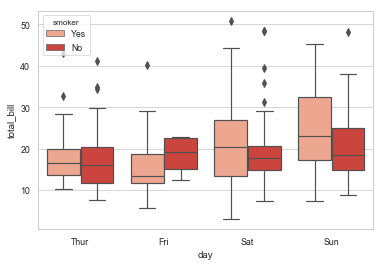

In [52]:
# 通过hue进行再分类

sns.boxplot(x='day',
           y='total_bill',
           data=tips,
           hue='smoker',
           palette='Reds')

### violinplot() 小提琴图
用法同boxplot()类似

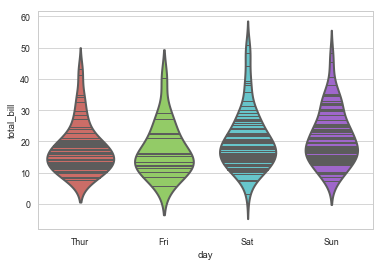

In [53]:
sns.violinplot(x='day',
              y='total_bill',
              data=tips,
              linewidth=2, # 线宽
              width=0.8, # 箱之间的间隔比例
              palette='hls', # 调色板
              order=['Thur', 'Fri', 'Sat', 'Sun'], # 筛选
              scale='area', # 测量小提琴图的宽度：面积相同area，依照样本数决定宽度count，宽度一样width
              # gridsize=50, # 设置小提琴图边线的平滑度，越高越平滑
              inner='stick' # 设置内部显示类型：箱型bpx/分位数quartile/散点图point/划线stick/None
              # bw=0.8 # 控制拟合程度，越大越平滑一般可以不设置
              )

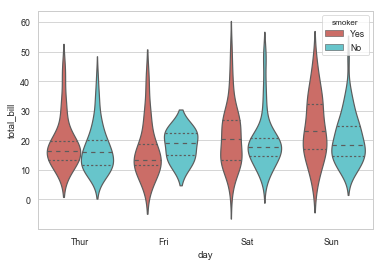

In [54]:
# hue参数进行再分类

sns.violinplot(x='day',
              y='total_bill',
              data=tips,
              hue='smoker', # 再分类
              palette='hls',
              split=False, # 是否拆分进行显示
              inner='quartile'
              )

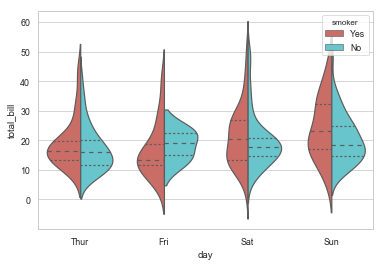

In [55]:
# hue参数进行再分类

sns.violinplot(x='day',
              y='total_bill',
              data=tips,
              hue='smoker', # 再分类
              palette='hls',
              split=True, # 是否拆分进行显示
              inner='quartile'
              )

### lvplot() LV图

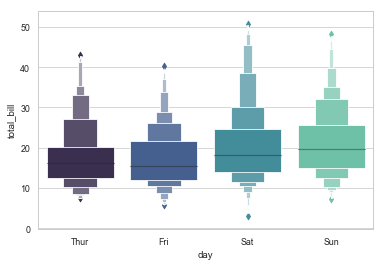

In [56]:
sns.lvplot(x='day',
          y='total_bill',
          data=tips,
          palette='mako',
          width=0.8, # 箱之间间隔比例
          linewidth=12,
          # scale='linear', # 设置框的大小：linear，exonential，面积相同area
          # k_depth='trustworthy' # 设置框的数量：proportion/tukey/trustworthy
          )

## 统计图
* barplot() 置信区间估计柱形图
* countplot() 计数柱状图
* pointplot() 

### barplot()  置信区间估计柱形图
**置信区间估计**包括：样本均值 + 抽样误差  
柱形图中，每个柱对应的高度为该分类下的平均值

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
--------


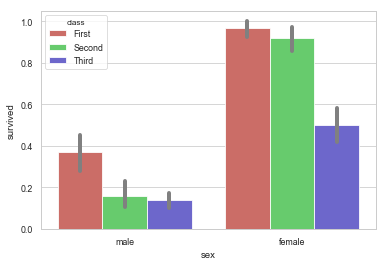

In [57]:
titanic = sns.load_dataset('titanic')
print(titanic.head())
print('--------')

sns.set_context('paper')
sns.barplot(x='sex',
           y='survived',
           hue='class',
           data=titanic,
           palette='hls',
           order=['male', 'female'],
           # capsize=0.05, # 误差线横向延伸宽度
           # saturation=.8, # 颜色饱和度
           errcolor='gray', # 误差线颜色
           errwidth=4, # 误差线宽度
           # ci='sd' # 置信区间误差--> [0, 100]/sd/None
           ) 

total_bill       tip      size
day  sex                                   
Thur Male     18.714667  2.980333  2.433333
     Female   16.715312  2.575625  2.468750
Fri  Male     19.857000  2.693000  2.100000
     Female   14.145556  2.781111  2.111111
Sat  Male     20.802542  3.083898  2.644068
     Female   19.680357  2.801786  2.250000
Sun  Male     21.887241  3.220345  2.810345
     Female   19.872222  3.367222  2.944444

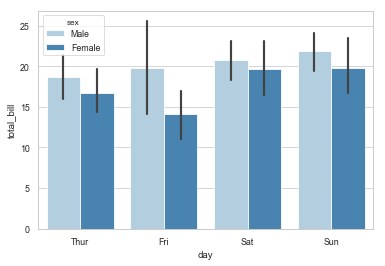

In [58]:
# barplot高度为对应分类的均值

sns.barplot(x='day',
           y='total_bill',
           hue='sex',
           data=tips,
           palette='Blues',
           edgecolor='w'
           )

tips.groupby(['day', 'sex']).mean()

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
40   23.9     9.082    9.799          22.944       19.359       858.97   
34   23.9     5.497   10.038          23.661       20.554       688.75   
48   23.8     8.092    6.664          23.086       20.706       992.61   
3    22.4     4.032    5.824          21.056       21.280       827.34   
17   21.4     4.066    4.922          16.692       16.264       872.51   

    ins_losses abbrev  
40      116.29     SC  
34      109.72     ND  
48      152.56     WV  
3       142.39     AR  
17      137.13     KY  


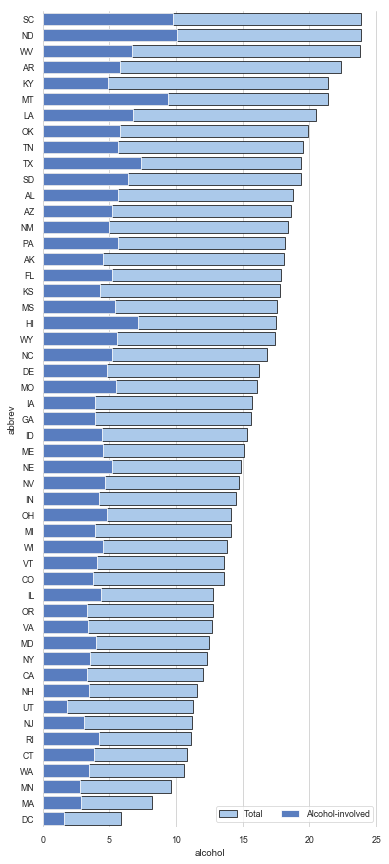

In [59]:
crashes = sns.load_dataset('car_crashes').sort_values('total', ascending=False)
print(crashes.head())

# 创建图表
f, ax = plt.subplots(figsize=(6, 15))

# 第一个柱形图, total值
sns.set_color_codes('pastel')
sns.barplot(x='total',
           y='abbrev',
           data=crashes,
           label='Total',
           color='b',
           edgecolor='k'
           )

# 第二个柱形图，alcohol值
sns.set_color_codes('muted')
sns.barplot(x='alcohol',
           y='abbrev',
           data=crashes,
           label='Alcohol-involved',
           color='b',
           edgecolor='w'
           )

ax.legend(ncol=2, loc='lower right')
sns.despine(left=True, bottom=True)

### countplot() 计数柱状图
* x/y参数只需要设置一个。设置x，以x轴绘图，横向排列；设置y，以y轴绘图，纵向排列

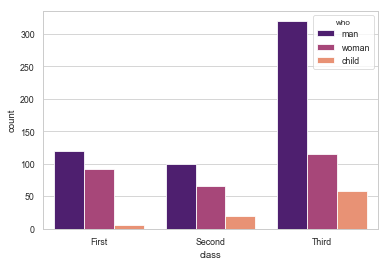

In [60]:
# 设置x轴，横向排列

sns.countplot(x='class',
             hue='who',
             data=titanic,
             palette='magma'
             )

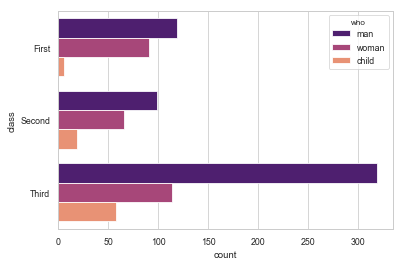

In [61]:
# 设置y轴，纵向排列

sns.countplot(y='class',
             hue='who',
             data=titanic,
             palette='magma'
             )

### pointplot() 置信区间估计折线图
仍然为**均值**统计

time    smoker
Lunch   Yes       17.399130
        No        17.050889
Dinner  Yes       21.859429
        No        20.095660
Name: total_bill, dtype: float64

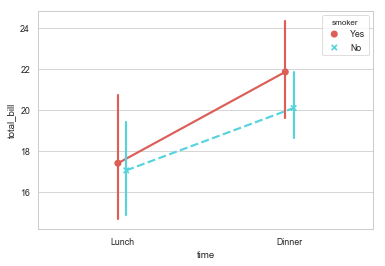

In [62]:
sns.pointplot(x='time',
             y='total_bill',
             hue='smoker',
             data=tips,
             palette='hls',
             dodge=True, # 设置点是否分开
             join=True, # 是否连线
             markers=['o', 'x'],
             linestyles=['-', '--'],
             )
tips.groupby(['time', 'smoker']).mean()['total_bill']

# 线性关系数据可视化
回归分析散点图+折线图，默认为一元回归
* lmplot()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


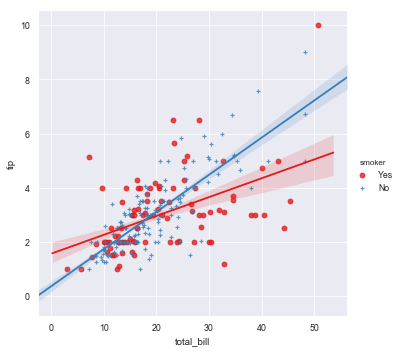

In [63]:
sns.set_style('darkgrid')
sns.set_context('paper')

tips = sns.load_dataset('tips')
print(tips.head())

sns.lmplot(x='total_bill',
          y='tip',
          hue='smoker',
          data=tips,
          palette='Set1',
          ci=70, # 误差值
          size=5, # 图标大小
          markers=['o', '+'], # 点样式
          )

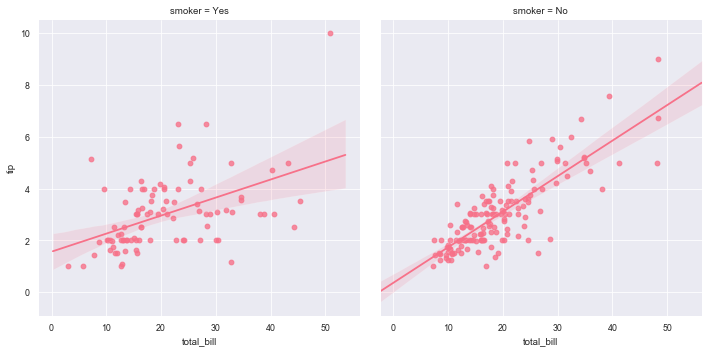

In [64]:
# 多图表0
# col对数据进行分类，每个分类绘制一张图

sns.lmplot(x='total_bill',
          y='tip',
          data=tips,
          col='smoker' # 依照smoker进行分类，绘制多张图
          )

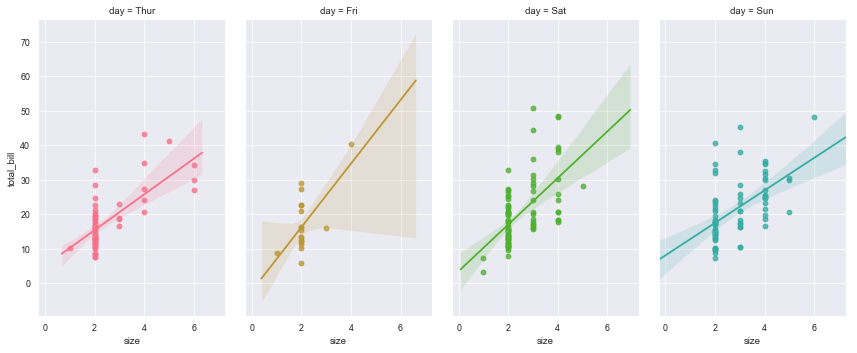

In [65]:
# 多图表1

sns.lmplot(x='size',
          y='total_bill',
          hue='day', # 方便为每一类设置不同颜色
          col='day', # 依据day做分类
          data=tips,
          aspect=0.6, # 长宽比
          # x_jitter=30, # 给x/y轴随机增加噪音点
          col_wrap=4, # 每一行有4列
          )

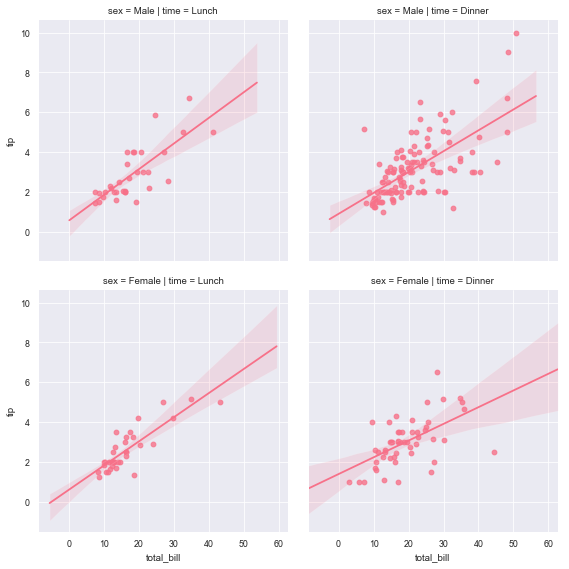

In [66]:
# 多图表2
# row/col 设置各图表如何排列

sns.lmplot(x='total_bill',
          y='tip',
          row='sex', # 设置行为sex字段
          col='time', # 列为time字段
          data=tips,
          size=4
          )

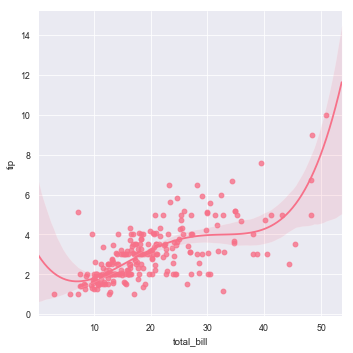

In [67]:
# 非线性回归
# order设置几次方的回归

sns.lmplot(x='total_bill',
          y='tip',
          data=tips,
          order=4 # 四次方回归
          )

# 其他图表可视化

## tsplot() 时间线图表

(10, 31)


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.746118,1.545040,1.667194,1.853757,1.518682,1.628014,0.892467,0.176049,0.192868,0.274874,...,0.130290,0.312849,-0.321514,0.287911,0.568174,1.750554,2.107979,1.682150,2.383329,1.287402
1,0.034908,0.319652,1.488950,1.155551,0.953585,1.029228,0.237269,-0.038293,-0.822816,-0.364441,...,-0.239367,-0.920349,-0.147422,-0.207589,-0.143037,0.535911,1.193892,0.956977,0.785630,0.785551
2,0.078696,0.808354,1.112958,1.246277,0.857828,0.550764,-0.231041,-0.130986,-0.530303,-1.435011,...,-1.307153,-1.012836,-1.123516,-0.436164,0.365899,0.432687,1.134172,0.841081,0.526522,0.919894
3,-1.473420,-0.506123,0.050519,0.047461,-0.559766,-0.434673,-1.432863,-1.272354,-1.974464,-2.417210,...,-2.410310,-1.913487,-2.153754,-1.730756,-1.099718,-1.013201,-0.581868,-0.353806,-0.701239,-0.646919
4,1.322106,1.715904,2.388471,2.251172,1.839994,1.832662,1.546913,0.866323,-0.085969,0.379890,...,0.322537,0.169792,0.482930,0.279505,0.900050,1.561628,1.900736,2.600499,1.625116,1.960267


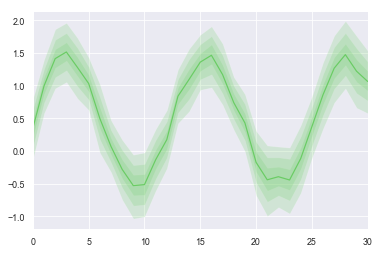

In [68]:
# 简单示例

# 创建数据
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
print(data.shape)

sns.tsplot(data=data,
          err_style='ci_band', # 误差数据风格：ci_band/ci_bars/boot_traces/boot_kde/unit_traces/unit_points
          interpolate=True, # 是否连线
          ci=[40, 70, 90], # 设置误差区间
          color='g' # 设置颜色
          )

pd.DataFrame(data).head()

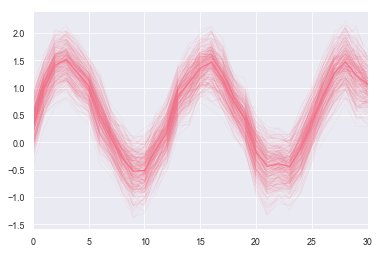

In [69]:
sns.tsplot(data=data,
          err_style='boot_traces',
          n_boot=300 # 迭代次数，代表绘制300条线
          )

In [70]:
# gammas = sns.load_dataset('gammas')
# print(gammas.head())

# sns.tsplot(time='timeout', # 时间数据，x轴
#           value='BOLD signal', # value，y轴
#           unit='subject',
#           condition='ROI', # 分类绘制
#           data=gammas
#           )

## heatmap() 热图

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.351819,0.261084,0.706302,0.624377,0.865149,0.840393,0.547000,0.007265,0.689710,0.619368,0.106506,0.518664
1,0.822166,0.157312,0.937079,0.341546,0.070360,0.778822,0.504634,0.406757,0.034423,0.177031,0.113124,0.302228
2,0.500898,0.803209,0.308139,0.520444,0.145091,0.556259,0.888910,0.922240,0.600649,0.726388,0.900902,0.762778
3,0.836667,0.315647,0.842224,0.471816,0.885436,0.370011,0.783569,0.712230,0.635150,0.975794,0.105731,0.635500
4,0.864786,0.889391,0.052651,0.086700,0.923011,0.094852,0.190393,0.167229,0.225088,0.832243,0.836038,0.498794


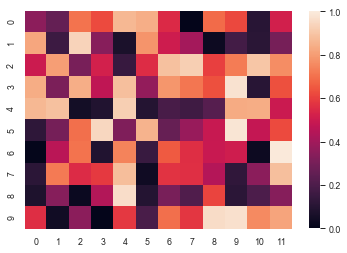

In [71]:
# 简单示例

df = pd.DataFrame(np.random.rand(10, 12))

sns.heatmap(df,
           vmin=0, # 图例最小值，用于设置显示颜色
           vmax=1 # 图例最大值
           )

df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


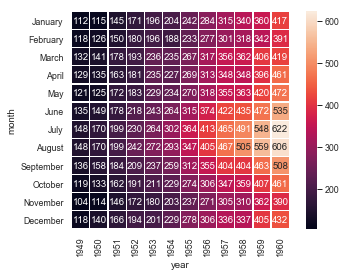

In [72]:
flights = sns.load_dataset('flights')
flights = flights.pivot('month', 'year', 'passengers')

sns.heatmap(flights,
           annot=True, # 是否显示数值
           fmt='d', # 格式化字符串，不设置即为科学技术法
           linewidths=0.2, # 格子的边线宽度
           # center=100, # 调色盘的色彩中心值。如果没有指定则以cmap为主
           # cmap = 'Reds', # 调色盘
           cbar=True, # 是否显示图例色带
           # cbar_kws={'orientation':'horizontal'}, # 是否横向显示图例色带
           square=True, # 是否正方形显示图表
           )

flights.head()

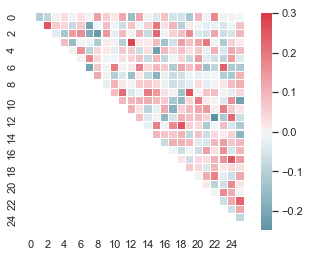

In [73]:
# 绘制半边热图

sns.set(style='white')
rs = np.random.RandomState(33)
d = pd.DataFrame(rs.normal(size=(100, 26)))
corr = d.corr() # 相关系数矩阵

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True # 设置一个“上三角形”蒙版

cmap = sns.diverging_palette(220, 10, as_cmap=True) # 设置调色板

sns.heatmap(corr,
            mask=mask, # 蒙版
            cmap=cmap,
            vmax=.3,
            center=0,
            square=True,
            linewidths=0.2
           )

# 结构化图表可视化
**FacetGrid()**  
* 根据分类自动生成结构化图表
* JointGrid()单独设置拆分散点图，PairGrid()单独设置矩阵散点图。FacetGrid()都可设置

## 直方图

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


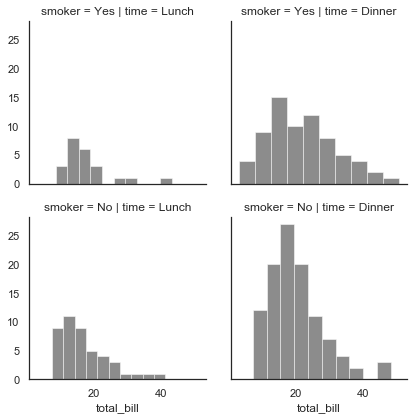

In [74]:
tips = sns.load_dataset('tips')
print(tips.head())

# 绘图表格区域，设置row&col并分组
g = sns.FacetGrid(tips, col='time', row='smoker',
                 size=3, # 图标大小
                 # aspect=0.5 # 图案长宽比
                 )

# 以total_bill字段做直方图统计
g.map(plt.hist, 'total_bill', alpha=0.5, color='k', bins=10)

## 散点图

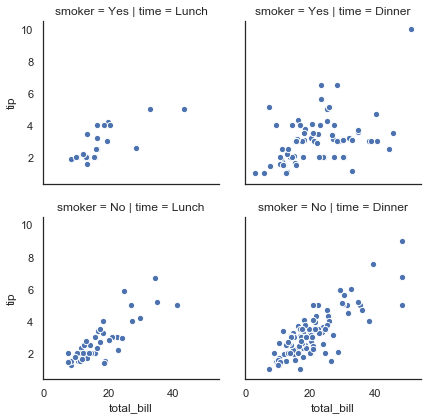

In [75]:
g = sns.FacetGrid(tips, col='time', row='smoker')

g.map(plt.scatter,
     'total_bill', # x轴数据
     'tip', # y轴数据
     edgecolor='w',
     s=40,
     linewidth=1
     )
g.add_legend()

## 图表矩阵

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


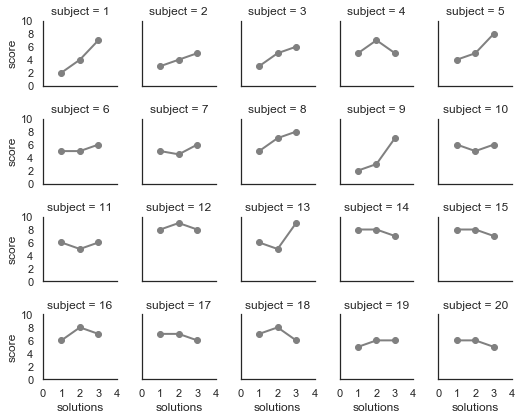

In [76]:
attend = sns.load_dataset('attention')

g = sns.FacetGrid(attend,
                 col='subject', # 依照subject进行分类
                 col_wrap=5, # 每行的图标数量
                 size=1.5
                 )

# 绘制图标矩阵
g.map(plt.plot, 'solutions', 'score',
     marker='o', color='gray', linewidth=2)

# x&y轴刻度
g.set(xlim=(0, 4),
     ylim=(0, 10),
     xticks=[0, 1, 2, 3, 4],
     yticks=[0, 2, 4, 6, 8, 10]
     )

attend.head()